# Import Libraries

In [9]:
#pip install imblearn
#!pip install shap

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [67]:
df = pd.read_csv("RTA Dataset.csv")

In [65]:
df = pd.read_csv("cleaned.csv")

<AxesSubplot:>

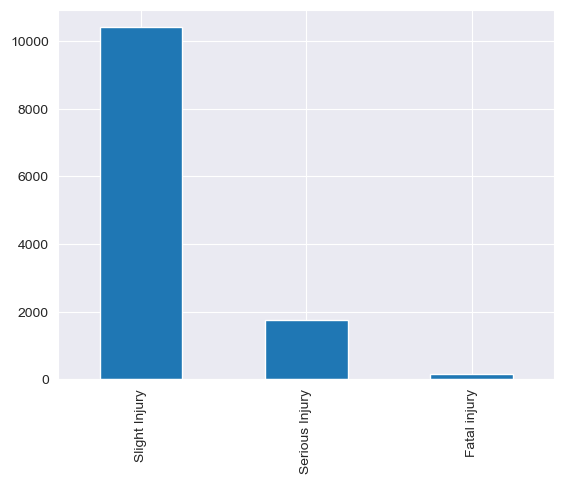

In [86]:
df['Accident_severity'].value_counts().plot(kind='bar')

# Exploratory Data Analysis

In [109]:
df.shape

(12316, 15)

In [110]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [135]:
# renaming columns
df = pd.read_csv("cleaned.csv")
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [133]:
df

Age_band_of_driver Sex_of_driver   Educational_level  \
0                  18-30          Male   Above high school   
1                  31-50          Male  Junior high school   
2                  18-30          Male  Junior high school   
3                  18-30          Male  Junior high school   
4                  18-30          Male  Junior high school   
...                  ...           ...                 ...   
12311              31-50          Male             Unknown   
12312            Unknown          Male   Elementary school   
12313            Over 51          Male  Junior high school   
12314              18-30        Female  Junior high school   
12315              18-30          Male  Junior high school   

      Vehicle_driver_relation Driving_experience  \
0                    Employee              1-2yr   
1                    Employee         Above 10yr   
2                    Employee              1-2yr   
3                    Employee             5-10yr   
4                    Employee              2-5yr   
...                       ...                ...   
12311                Employee              2-5yr   
12312                Employee             5-10yr   
12313                Employee             5-10yr   
12314                Employee         Above 10yr   
12315                Employee             5-10yr   

                                       Lanes_or_Medians Types_of_Junction  \
0                                               Unknown       No junction   
1                                     Undivided Two way       No junction   
2                                                 other       No junction   
3                                                 other           Y Shape   
4                                                 other           Y Shape   
...                                                 ...               ...   
12311                                 Undivided Two way       No junction   
12312  Two-way (divided with broken lines road marking)       No junction   
12313  Two-way (divided with broken lines road marking)       No junction   
12314                                 Undivided Two way       No junction   
12315                                 Undivided Two way           O Shape   

      Road_surface_type       Light_conditions Weather_conditions  \
0         Asphalt roads               Daylight             Normal   
1         Asphalt roads               Daylight             Normal   
2         Asphalt roads               Daylight             Normal   
3           Earth roads  Darkness - lights lit             Normal   
4         Asphalt roads  Darkness - lights lit             Normal   
...                 ...                    ...                ...   
12311     Asphalt roads               Daylight             Normal   
12312     Asphalt roads               Daylight             Normal   
12313     Asphalt roads               Daylight             Normal   
12314     Asphalt roads  Darkness - lights lit             Normal   
12315     Asphalt roads  Darkness - lights lit             Normal   

                             Type_of_collision Vehicle_movement  \
0      Collision with roadside-parked vehicles   Going straight   
1               Vehicle with vehicle collision   Going straight   
2              Collision with roadside objects   Going straight   
3               Vehicle with vehicle collision   Going straight   
4               Vehicle with vehicle collision   Going straight   
...                                        ...              ...   
12311           Vehicle with vehicle collision   Going straight   
12312           Vehicle with vehicle collision            Other   
12313           Vehicle with vehicle collision            Other   
12314           Vehicle with vehicle collision            Other   
12315           Vehicle with vehicle collision         Stopping   

                                     Pedestrian_movement  \
0                

In [117]:
# Create an empty DataFrame with the same column names as the original DataFrame
unique_df = pd.DataFrame(columns=df.columns)

# Loop through each column and append the unique items to the new DataFrame
for col in df.columns:
    unique_items = df[col].unique()
    unique_series = pd.Series(unique_items, index=range(len(unique_items)))
    unique_df[col] = unique_series

# # Print the new DataFrame
# print(unique_df)



In [34]:
for i in df.columns:
    print(i,df[i].unique())

driver_age ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
driver_sex ['Male' 'Female' 'Unknown']
educational_level ['Above high school' 'Junior high school' 'Unknown' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']
vehicle_driver_relation ['Employee' 'Unknown' 'Owner' 'Other']
driving_experience ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Unknown' 'No Licence' 'Below 1yr'
 'unknown']
lanes ['Unknown' 'Undivided Two way' 'other' 'Double carriageway (median)'
 'One way' 'Two-way (divided with solid lines road marking)'
 'Two-way (divided with broken lines road marking)']
junction_type ['No junction' 'Y Shape' 'Crossing' 'O Shape' 'Other' 'Unknown' 'T Shape'
 'X Shape']
surface_type ['Asphalt roads' 'Earth roads' 'Unknown'
 'Asphalt roads with some distress' 'Gravel roads' 'Other']
light_condition ['Daylight' 'Darkness - lights lit' 'Darkness - no lighting'
 'Darkness - lights unlit']
weather_condition ['Normal' 'Raining' 'Raining and Windy' 'Cloudy' 'Other' 'Windy' 'Sn

In [122]:
unique_df['accident_cause']

0               Moving Backward
1                    Overtaking
2     Changing lane to the left
3    Changing lane to the right
4                   Overloading
Name: accident_cause, dtype: object

In [119]:
unique_df.to_csv('unique.csv')

In [9]:
# # converting 'time' to datetime
# df['time'] = pd.to_datetime(df['time'])

# # date (day-month-year) time
# df["time"].dt.hour

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  object
 1   driver_sex               12316 non-null  object
 2   educational_level        12316 non-null  object
 3   vehicle_driver_relation  12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   lanes                    12316 non-null  object
 6   junction_type            12316 non-null  object
 7   surface_type             12316 non-null  object
 8   light_condition          12316 non-null  object
 9   weather_condition        12316 non-null  object
 10  collision_type           12316 non-null  object
 11  vehicle_movement         12316 non-null  object
 12  pedestrian_movement      12316 non-null  object
 13  accident_cause           12316 non-null  object
 14  accident_severity        12316 non-nul

In [11]:
df.describe(include=['O']).T

count unique  \
driver_age               12316      5   
driver_sex               12316      3   
educational_level        12316      7   
vehicle_driver_relation  12316      4   
driving_experience       12316      8   
lanes                    12316      7   
junction_type            12316      8   
surface_type             12316      6   
light_condition          12316      4   
weather_condition        12316      9   
collision_type           12316     10   
vehicle_movement         12316     13   
pedestrian_movement      12316      9   
accident_cause           12316     20   

                                                                      top  \
driver_age                                                          18-30   
driver_sex                                                           Male   
educational_level                                      Junior high school   
vehicle_driver_relation                                          Employee   
driving_experience                                                 5-10yr   
lanes                    Two-way (divided with broken lines road marking)   
junction_type                                                     Y Shape   
surface_type                                                Asphalt roads   
light_condition                                                  Daylight   
weather_condition                                                  Normal   
collision_type                             Vehicle with vehicle collision   
vehicle_movement                                           Going straight   
pedestrian_movement                                      Not a Pedestrian   
accident_cause                                              No distancing   

                          freq  
driver_age                4271  
driver_sex               11437  
educational_level         7619  
vehicle_driver_relation   9627  
driving_experience        3363  
lanes                     4411  
junction_type             4543  
surface_type             11296  
light_condition           8798  
weather_condition        10063  
collision_type            8774  
vehicle_movement          8158  
pedestrian_movement      11390  
accident_cause            2263

In [12]:
df.describe()

accident_severity
count       12316.000000
mean            1.832819
std             0.406082
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
max             2.000000

In [13]:
df.isna().sum()

driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
lanes                      0
junction_type              0
surface_type               0
light_condition            0
weather_condition          0
collision_type             0
vehicle_movement           0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

In [14]:
# print duplicates
print("Number of duplicates: ", df.duplicated().sum())
print("Unique values per column:")
df.nunique()

Number of duplicates:  390
Unique values per column:


driver_age                  5
driver_sex                  3
educational_level           7
vehicle_driver_relation     4
driving_experience          8
lanes                       7
junction_type               8
surface_type                6
light_condition             4
weather_condition           9
collision_type             10
vehicle_movement           13
pedestrian_movement         9
accident_cause             20
accident_severity           3
dtype: int64

In [16]:
# # extracting hour and minute from timestamp
# df['hour'] = df['time'].dt.hour
# df['minute'] = df['time'].dt.minute
# df.drop('time', axis=1, inplace=True)

In [17]:
df.head()

driver_age driver_sex   educational_level vehicle_driver_relation  \
0      18-30       Male   Above high school                Employee   
1      31-50       Male  Junior high school                Employee   
2      18-30       Male  Junior high school                Employee   
3      18-30       Male  Junior high school                Employee   
4      18-30       Male  Junior high school                Employee   

  driving_experience              lanes junction_type   surface_type  \
0              1-2yr            Unknown   No junction  Asphalt roads   
1         Above 10yr  Undivided Two way   No junction  Asphalt roads   
2              1-2yr              other   No junction  Asphalt roads   
3             5-10yr              other       Y Shape    Earth roads   
4              2-5yr              other       Y Shape  Asphalt roads   

         light_condition weather_condition  \
0               Daylight            Normal   
1               Daylight            Normal   
2               Daylight            Normal   
3  Darkness - lights lit            Normal   
4  Darkness - lights lit            Normal   

                            collision_type vehicle_movement  \
0  Collision with roadside-parked vehicles   Going straight   
1           Vehicle with vehicle collision   Going straight   
2          Collision with roadside objects   Going straight   
3           Vehicle with vehicle collision   Going straight   
4           Vehicle with vehicle collision   Going straight   

  pedestrian_movement              accident_cause  accident_severity  
0    Not a Pedestrian             Moving Backward                  2  
1    Not a Pedestrian                  Overtaking                  2  
2    Not a Pedestrian   Changing lane to the left                  1  
3    Not a Pedestrian  Changing lane to the right                  2  
4    Not a Pedestrian                  Overtaking                  2

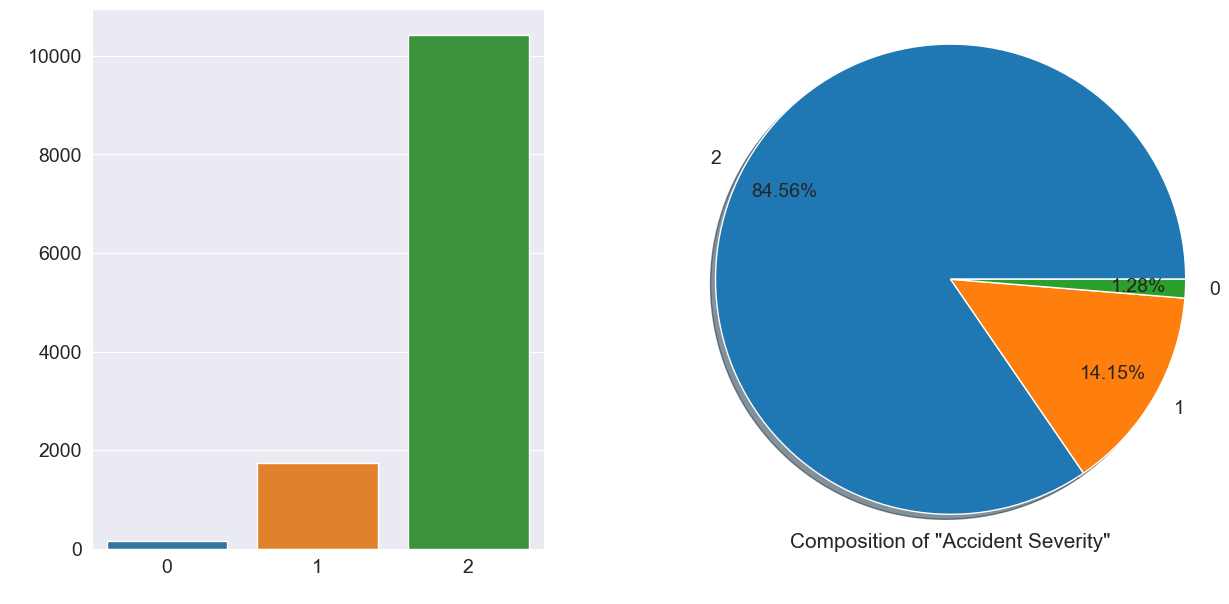

In [18]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["accident_severity"].value_counts(),
        labels=list(df["accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [20]:
# plt.figure(figsize=(15,70))
# plotnumber = 1

# for col in df.drop(['hour', 'minute', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1):
#     if plotnumber <= df.shape[1]:
#         ax1 = plt.subplot(16,2,plotnumber)
#         sns.countplot(data=df, y=col, palette='Dark2')
#         plt.xticks(fontsize=12)
#         plt.yticks(fontsize=12)
#         plt.title(col.title(), fontsize=14)
#         plt.xlabel('')
#         plt.ylabel('')
#     plotnumber +=1
# plt.tight_layout()

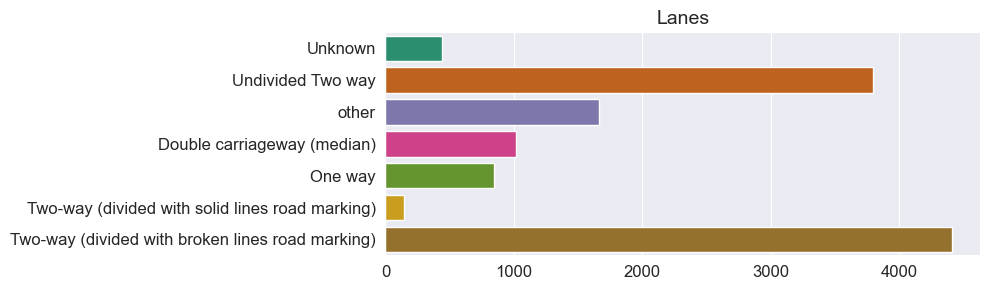

In [21]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [23]:
# plt.figure(figsize=(10,3))
# sns.countplot(data=df, y='road_allignment', palette = 'Dark2')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('Road Allignment', fontsize=14)
# plt.xlabel('')
# plt.ylabel('')
# plt.tight_layout()

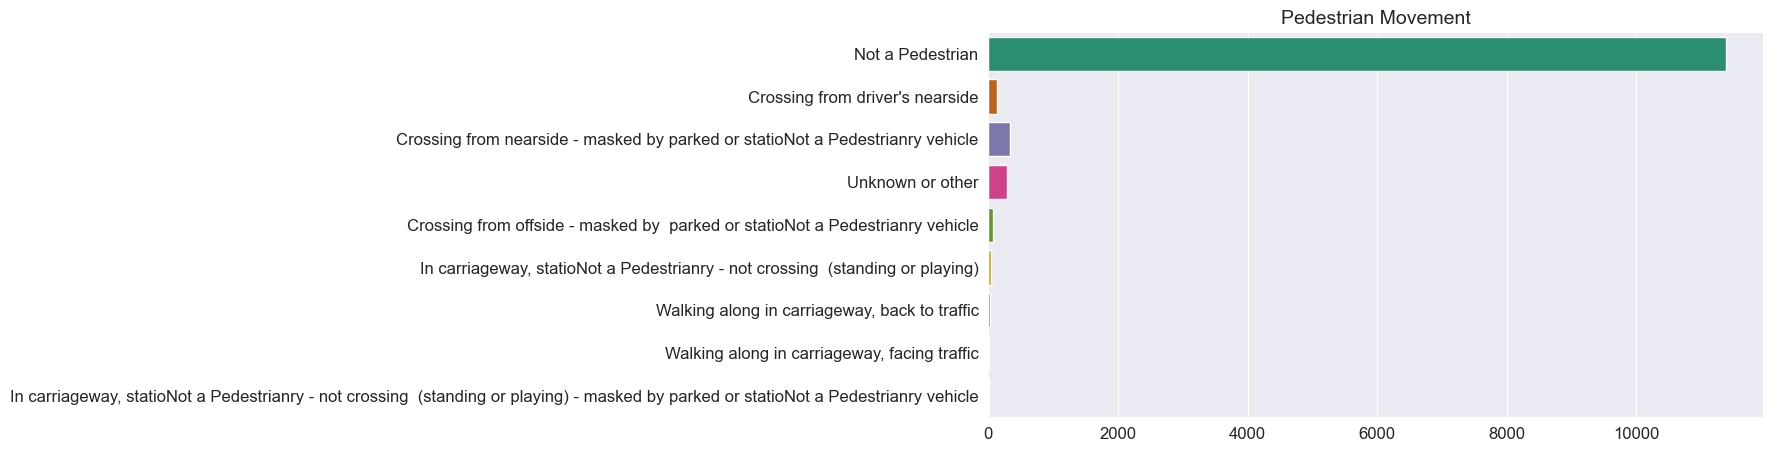

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [26]:
# plt.figure(figsize=(10,5))
# sns.countplot(data=df, y='hour')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('Hour', fontsize=14)
# plt.xlabel('')
# plt.ylabel('')
# plt.tight_layout()

In [28]:
# plt.figure(figsize=(10,15))
# sns.countplot(data=df, y='minute')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('Minute', fontsize=14)
# plt.xlabel('')
# plt.ylabel('')
# plt.tight_layout()

#### Observations:

Most of the accidents:
* involved 2 vehicles and 2 casualties
* occured on Fridays and after noon hours

Most of the drivers:
* are male and in 18-30 yrs age group
* have only went upto Junior high school and are employees
* have 5-10 yrs of driving experience

Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

#### Observations:
* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.

In [29]:
# min = list(range(5,56, 5))
# def convert_minutes(x: int):
#     for m in min:
#         if x % m == x and x > m-5:
#             return m
#         if x in [56,57,58,59]:
#             return 0
#         if x in min+[0]:
#             return x

In [32]:
# df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

In [33]:
# plt.figure(figsize=(5,7))
# sns.countplot(data=df, y='minute')
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.title('Minute', fontsize=14)
# plt.xlabel('')
# plt.ylabel('')
# plt.tight_layout()

In [34]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

driver_age driver_sex   educational_level vehicle_driver_relation  \
0          18-30       Male   Above high school                Employee   
1          31-50       Male  Junior high school                Employee   
2          18-30       Male  Junior high school                Employee   
3          18-30       Male  Junior high school                Employee   
4          18-30       Male  Junior high school                Employee   
...          ...        ...                 ...                     ...   
12311      31-50       Male             Unknown                Employee   
12312    Unknown       Male   Elementary school                Employee   
12313    Over 51       Male  Junior high school                Employee   
12314      18-30     Female  Junior high school                Employee   
12315      18-30       Male  Junior high school                Employee   

      driving_experience                                             lanes  \
0                  1-2yr                                           Unknown   
1             Above 10yr                                 Undivided Two way   
2                  1-2yr                                             other   
3                 5-10yr                                             other   
4                  2-5yr                                             other   
...                  ...                                               ...   
12311              2-5yr                                 Undivided Two way   
12312             5-10yr  Two-way (divided with broken lines road marking)   
12313             5-10yr  Two-way (divided with broken lines road marking)   
12314         Above 10yr                                 Undivided Two way   
12315             5-10yr                                 Undivided Two way   

      junction_type   surface_type        light_condition weather_condition  \
0       No junction  Asphalt roads               Daylight            Normal   
1       No junction  Asphalt roads               Daylight            Normal   
2       No junction  Asphalt roads               Daylight            Normal   
3           Y Shape    Earth roads  Darkness - lights lit            Normal   
4           Y Shape  Asphalt roads  Darkness - lights lit            Normal   
...             ...            ...                    ...               ...   
12311   No junction  Asphalt roads               Daylight            Normal   
12312   No junction  Asphalt roads               Daylight            Normal   
12313   No junction  Asphalt roads               Daylight            Normal   
12314   No junction  Asphalt roads  Darkness - lights lit            Normal   
12315       O Shape  Asphalt roads  Darkness - lights lit            Normal   

                                collision_type vehicle_movement  \
0      Collision with roadside-parked vehicles   Going straight   
1               Vehicle with vehicle collision   Going straight   
2              Collision with roadside objects   Going straight   
3               Vehicle with vehicle collision   Going straight   
4               Vehicle with vehicle collision   Going straight   
...                                        ...              ...   
12311           Vehicle with vehicle collision   Going straight   
12312           Vehicle with vehicle collision            Other   
12313           Vehicle with vehicle collision            Other   
12314           Vehicle with vehicle collision            Other   
12315           Vehicle with vehicle collision         Stopping   

                                     pedestrian_movement  \
0                                       Not a Pedestrian   
1                                       Not a Pedestrian   
2                                       Not a Pedestrian   
3                                       Not a Pedestrian   
4                                       Not a Pedestrian   
...                                                  .

# Preprocessing

In [35]:
df.isna().sum()[df.isna().sum() != 0]

Series([], dtype: int64)

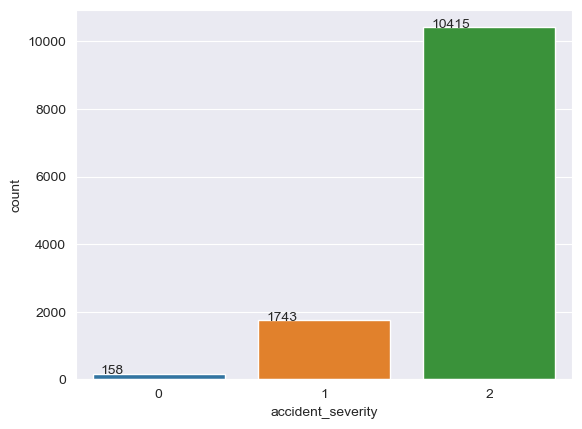

In [36]:
ax = sns.countplot(x=df["accident_severity"])
for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))

plt.show()

In [37]:
# fig = plt.figure(figsize = (17,20))
# fig.subplots_adjust(hspace=1, wspace=0.6)
# colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
# cols = df.isna().sum()[df.isna().sum() != 0].index.tolist()
# for i,col in enumerate(cols):
#     ax = fig.add_subplot(4, 4, i+1)
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
#     sns.countplot(x=df.dropna(subset=[col])["accident_severity"])
#     for p in ax.patches:
#       ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))
#     ax.set_title('column: ' + str(col))
# plt.show()

In [39]:
# dropping columns that can cause imbalance while imputation
# df.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness',], inplace=True)

In [40]:
# 1 df[df["feature_name"] == "class_with_high_mode"].sample(5000)
# 2 df[~["feature_name"] == "class_with_high_mode"]
# 1+2

In [41]:
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = df[feat].mode()[0]
    df[feat].fillna(mode, inplace=True)

In [123]:
df.isna().sum() 
# 'na', 'Unknown'

driver_age                 0
driver_sex                 0
educational_level          0
vehicle_driver_relation    0
driving_experience         0
lanes                      0
junction_type              0
surface_type               0
light_condition            0
weather_condition          0
collision_type             0
vehicle_movement           0
pedestrian_movement        0
accident_cause             0
accident_severity          0
dtype: int64

In [29]:
# renaming columns
df = pd.read_csv("cleaned.csv")
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
df.rename(columns=col_map, inplace=True)

In [30]:
y=df['accident_severity']

In [31]:
y

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: accident_severity, Length: 12316, dtype: int64

In [153]:
df['accident_cause'].astype(str)

0                             Moving Backward
1                                  Overtaking
2                   Changing lane to the left
3                  Changing lane to the right
4                                  Overtaking
                         ...                 
12311                           No distancing
12312                           No distancing
12313              Changing lane to the right
12314    Driving under the influence of drugs
12315              Changing lane to the right
Name: accident_cause, Length: 12316, dtype: object

In [17]:
for i in df.columns:
    df[i]=df[i].astype('string')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  string
 1   driver_sex               12316 non-null  string
 2   educational_level        12316 non-null  string
 3   vehicle_driver_relation  12316 non-null  string
 4   driving_experience       12316 non-null  string
 5   lanes                    12316 non-null  string
 6   junction_type            12316 non-null  string
 7   surface_type             12316 non-null  string
 8   light_condition          12316 non-null  string
 9   weather_condition        12316 non-null  string
 10  collision_type           12316 non-null  string
 11  vehicle_movement         12316 non-null  string
 12  pedestrian_movement      12316 non-null  string
 13  accident_cause           12316 non-null  string
 14  accident_severity        12316 non-nul

In [137]:
df['accident_severity'].astype(str)

0        2
1        2
2        1
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: accident_severity, Length: 12316, dtype: object

In [32]:
X=df.drop(['accident_severity'],axis=1)

In [21]:
X.columns

Index(['driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'lanes',
       'junction_type', 'surface_type', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement', 'pedestrian_movement',
       'accident_cause'],
      dtype='object')

In [22]:
X['driver_age']=X['driver_age'].astype('string')

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  object
 1   driver_sex               12316 non-null  object
 2   educational_level        12316 non-null  object
 3   vehicle_driver_relation  12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   lanes                    12316 non-null  object
 6   junction_type            12316 non-null  object
 7   surface_type             12316 non-null  object
 8   light_condition          12316 non-null  object
 9   weather_condition        12316 non-null  object
 10  collision_type           12316 non-null  object
 11  vehicle_movement         12316 non-null  object
 12  pedestrian_movement      12316 non-null  object
 13  accident_cause           12316 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB


In [7]:
for i in X.columns:
    X[i]=X[i].astype('string')
    

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  string
 1   driver_sex               12316 non-null  string
 2   educational_level        12316 non-null  string
 3   vehicle_driver_relation  12316 non-null  string
 4   driving_experience       12316 non-null  string
 5   lanes                    12316 non-null  string
 6   junction_type            12316 non-null  string
 7   surface_type             12316 non-null  string
 8   light_condition          12316 non-null  string
 9   weather_condition        12316 non-null  string
 10  collision_type           12316 non-null  string
 11  vehicle_movement         12316 non-null  string
 12  pedestrian_movement      12316 non-null  string
 13  accident_cause           12316 non-null  string
dtypes: string(14)
memory usage: 1.3 MB


In [15]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  object
 1   driver_sex               12316 non-null  object
 2   educational_level        12316 non-null  object
 3   vehicle_driver_relation  12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   lanes                    12316 non-null  object
 6   junction_type            12316 non-null  object
 7   surface_type             12316 non-null  object
 8   light_condition          12316 non-null  object
 9   weather_condition        12316 non-null  object
 10  collision_type           12316 non-null  object
 11  vehicle_movement         12316 non-null  object
 12  pedestrian_movement      12316 non-null  object
 13  accident_cause           12316 non-null  object
dtypes: object(14)
memory usage: 1.3+ MB
No

In [37]:
for i in X.columns:
    print(X[i].nunique())

5
3
7
4
8
7
8
6
4
9
10
13
9
20


In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# from sklearn.pipeline import Pipeline
# import joblib
# from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Create a LabelEncoder object and transform the categorical data
le = LabelEncoder()

for col in X.columns:
        X[col] = le.fit_transform(X[col])
        
# import pickle


# Create a label encoder object and fit it on the categorical data
# le = LabelEncoder()
# categorical_data = ['red', 'green', 'blue', 'red', 'green']
# le.fit(categorical_data)

# Save the encoding object to a file using pickle
# with open('encoding.pkl', 'wb') as f:
#     pickle.dump(le, f)

# Print the encoded dataframe
# print(df.head())

# define the preprocessing pipeline
# encoder = LabelEncoder()
# preprocessing_pipeline = Pipeline([
#     ('encoder', encoder)
# ])

# # fit the preprocessing pipeline on the training data
# preprocessing_pipeline.fit(df.drop(['accident_severity'], axis=1))

# # save the encoder
# joblib.dump(preprocessing_pipeline.named_steps['encoder'], 'encoder.joblib')

# # define the model pipeline
# model_pipeline = Pipeline([
#     ('preprocessing', preprocessing_pipeline),
#     ('model', LinearRegression())
# ])

# # fit the model pipeline on the training data
# model_pipeline.fit(df[['color', 'size', 'price']], df['price'])

# save the model pipeline
# joblib.dump(model_pipeline, 'model.joblib')


In [10]:
X

driver_age  driver_sex  educational_level  vehicle_driver_relation  \
0               0           1                  0                        0   
1               1           1                  4                        0   
2               0           1                  4                        0   
3               0           1                  4                        0   
4               0           1                  4                        0   
...           ...         ...                ...                      ...   
12311           1           1                  5                        0   
12312           4           1                  1                        0   
12313           2           1                  4                        0   
12314           0           0                  4                        0   
12315           0           1                  4                        0   

       driving_experience  lanes  junction_type  surface_type  \
0                       0      5              1             0   
1                       3      4              1             0   
2                       0      6              1             0   
3                       2      6              7             2   
4                       1      6              7             0   
...                   ...    ...            ...           ...   
12311                   1      4              1             0   
12312                   2      2              1             0   
12313                   2      2              1             0   
12314                   3      4              1             0   
12315                   2      4              2             0   

       light_condition  weather_condition  collision_type  vehicle_movement  \
0                    3                  2               3                 2   
1                    3                  2               8                 2   
2                    3                  2               2                 2   
3                    0                  2               8                 2   
4                    0                  2               8                 2   
...                ...                ...             ...               ...   
12311                3                  2               8                 2   
12312                3                  2               8                 4   
12313                3                  2               8                 4   
12314                0                  2               8                 4   
12315                0                  2               8                 8   

       pedestrian_movement  accident_cause  
0                        5               9  
1                        5              16  
2                        5               0  
3                        5               1  
4                        5              16  
...                    ...             ...  
12311                    5              10  
12312                    5              10  
12313                    5               1  
12314                    5               5  
12315                    1               1  

[12316 rows x 14 columns]

In [2]:
# feats=df.drop(['accident_severity'], axis=1).columns
# for feat in feats:    
#     feat_val = list(1+np.arange(df[feat].nunique()))
#     feat_key = list(df[feat].sort_values().unique())
#     feat_dict = dict(zip(feat_key,feat_val))
#     df[feat] = df[feat].map(feat_dict)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# feat_dict

### Encoding

In [5]:
# def ordinal_encoder(df, feats): 
#     for feat in feats:    
#         feat_val = list(1+np.arange(df[feat].nunique()))
#         feat_key = list(df[feat].sort_values().unique())
#         feat_dict = dict(zip(feat_key, feat_val))
#         df[feat] = df[feat].map(feat_dict)
# # Convert the mapping dictionary to a DataFrame
#        mapping_df = pd.DataFrame(feat_dict)
#     # Save the mapping DataFrame to a file
# #mapping_df.to_csv('mapping_dict.csv')
#     return df

# df = ordinal_encoder(df, df.drop(['accident_severity'], axis=1).columns)
# df.shape

# pd.dummies()

# Label Encoders, Onehot encoders
# functions, pipeline => 0-12 1-13

# pipeline ["encoding", "modelling"]

In [11]:
# import joblib

# # load the encoder
# encoder = joblib.load('encoder.joblib')

# # encode new data using the loaded encoder
# # new_data = pd.DataFrame({'color': ['red'], 'size': ['medium']})
# X_encoded = encoder.transform(df.drop(['accident_severity'],axis=1))
# # X_encoded = encoder.transform(new_data).toarray()

In [12]:
# X_encoded

<12316x113 sparse matrix of type '<class 'numpy.float64'>'
	with 172424 stored elements in Compressed Sparse Row format>

In [44]:
# "na", NaN, "Unknown"

In [45]:
df

driver_age  driver_sex  educational_level  vehicle_driver_relation  \
0               1           2                  1                        1   
1               2           2                  5                        1   
2               1           2                  5                        1   
3               1           2                  5                        1   
4               1           2                  5                        1   
...           ...         ...                ...                      ...   
12311           2           2                  6                        1   
12312           5           2                  2                        1   
12313           3           2                  5                        1   
12314           1           1                  5                        1   
12315           1           2                  5                        1   

       driving_experience  lanes  junction_type  surface_type  \
0                       1      6              2             1   
1                       4      5              2             1   
2                       1      7              2             1   
3                       3      7              8             3   
4                       2      7              8             1   
...                   ...    ...            ...           ...   
12311                   2      5              2             1   
12312                   3      3              2             1   
12313                   3      3              2             1   
12314                   4      5              2             1   
12315                   3      5              3             1   

       light_condition  weather_condition  collision_type  vehicle_movement  \
0                    4                  3               4                 3   
1                    4                  3               9                 3   
2                    4                  3               3                 3   
3                    1                  3               9                 3   
4                    1                  3               9                 3   
...                ...                ...             ...               ...   
12311                4                  3               9                 3   
12312                4                  3               9                 5   
12313                4                  3               9                 5   
12314                1                  3               9                 5   
12315                1                  3               9                 9   

       pedestrian_movement  accident_cause  accident_severity  
0                        6              10                  2  
1                        6              17                  2  
2                        6               1                  1  
3                        6               2                  2  
4                        6              17                  2  
...                    ...             ...                ...  
12311                    6              11                  2  
12312                    6              11                  2  
12313                    6               2                  1  
12314                    6               6                  2  
12315                    2               2                  2  

[12316 rows x 15 columns]

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

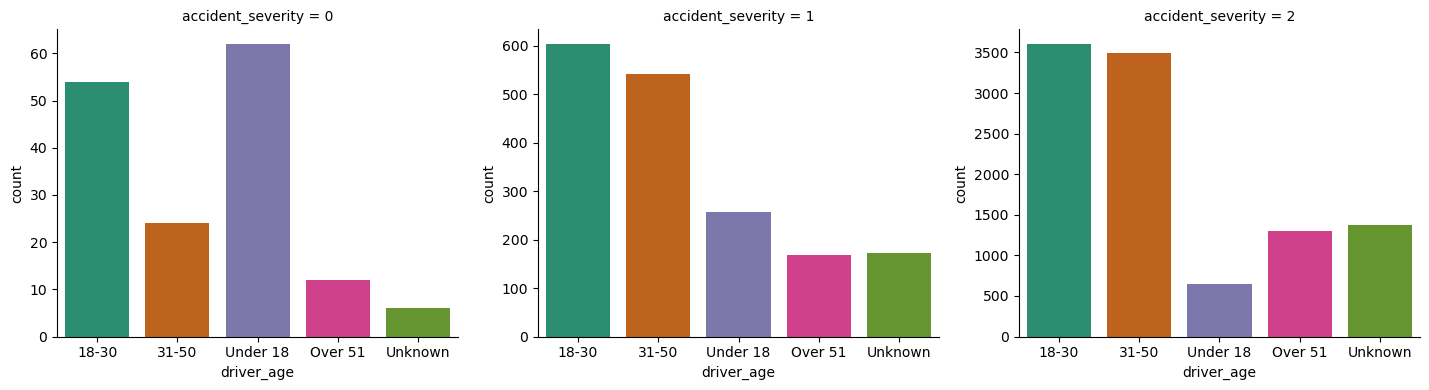

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

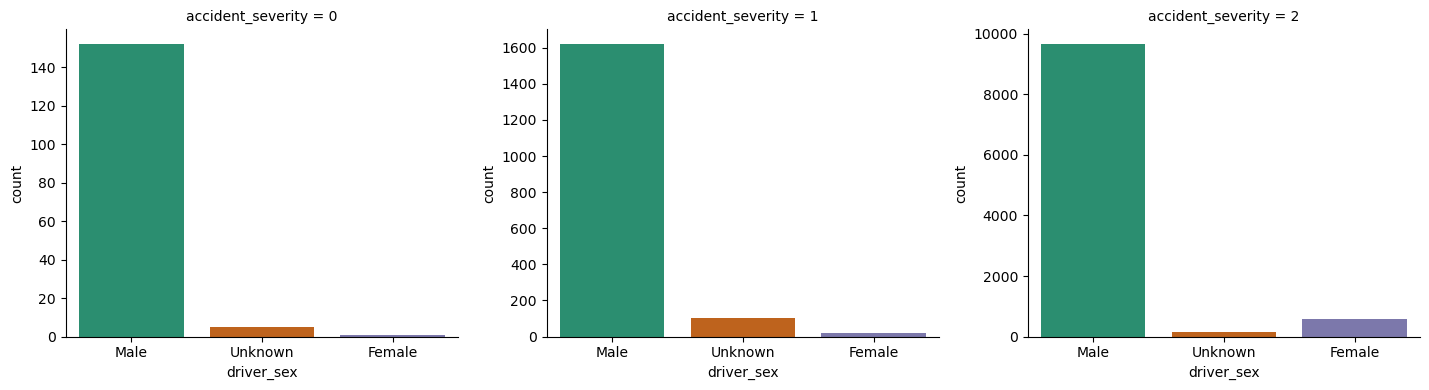

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

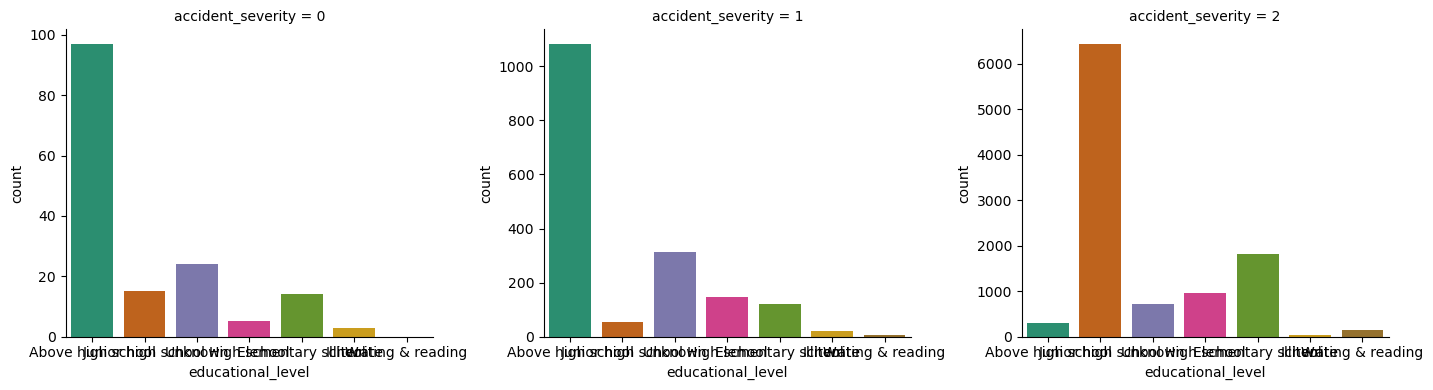

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

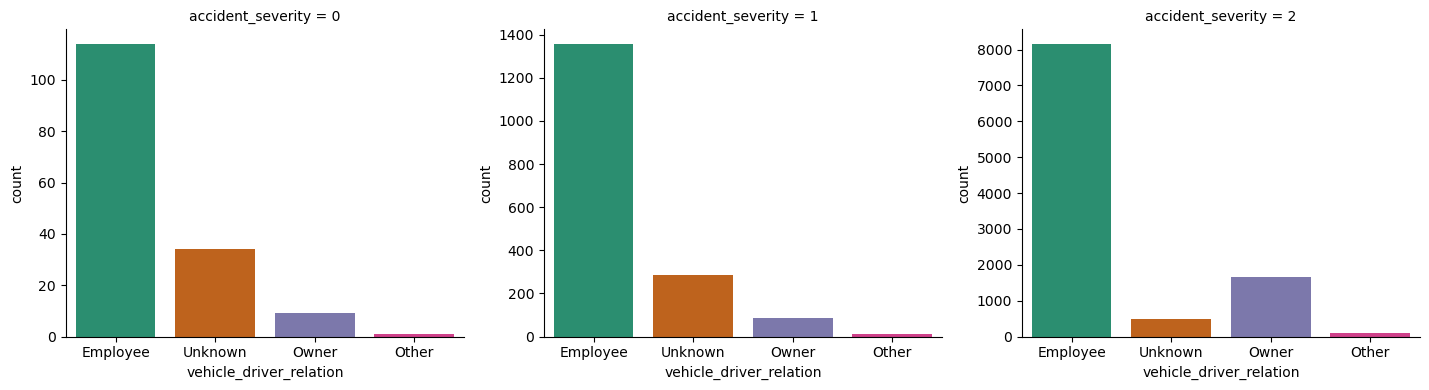

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

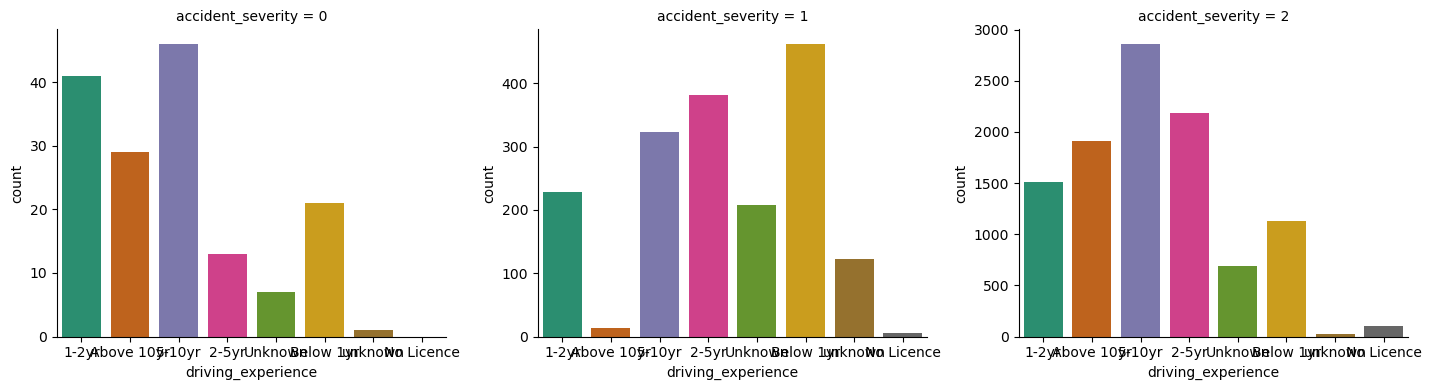

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

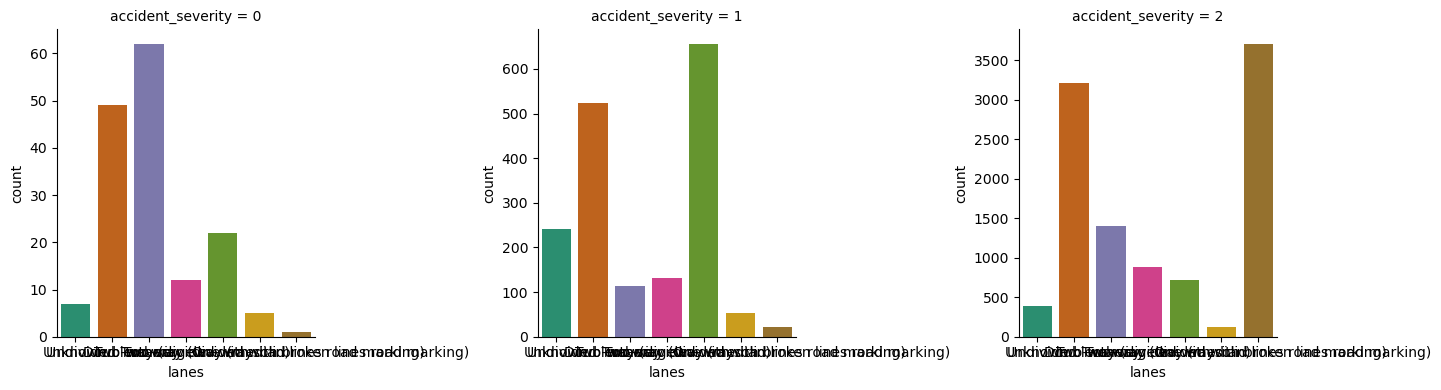

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

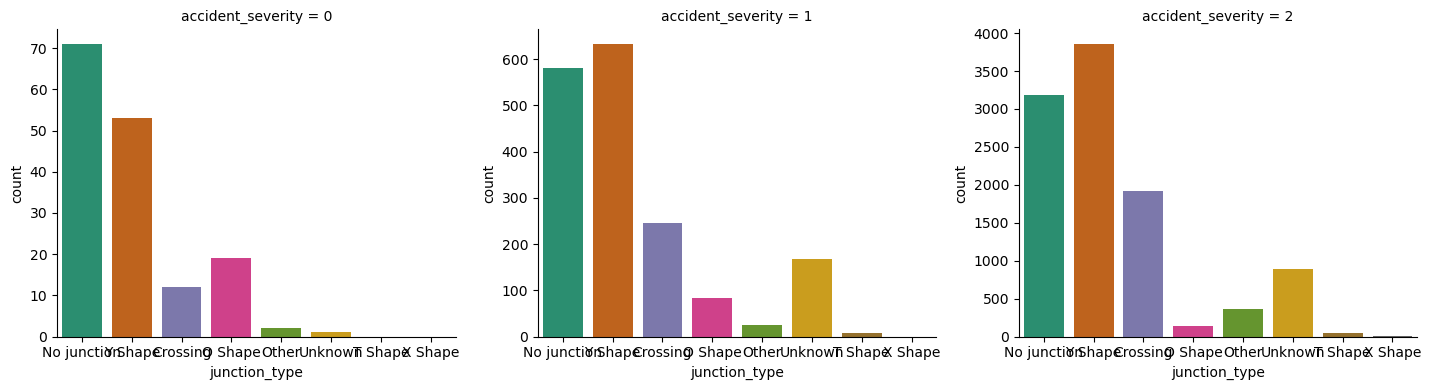

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

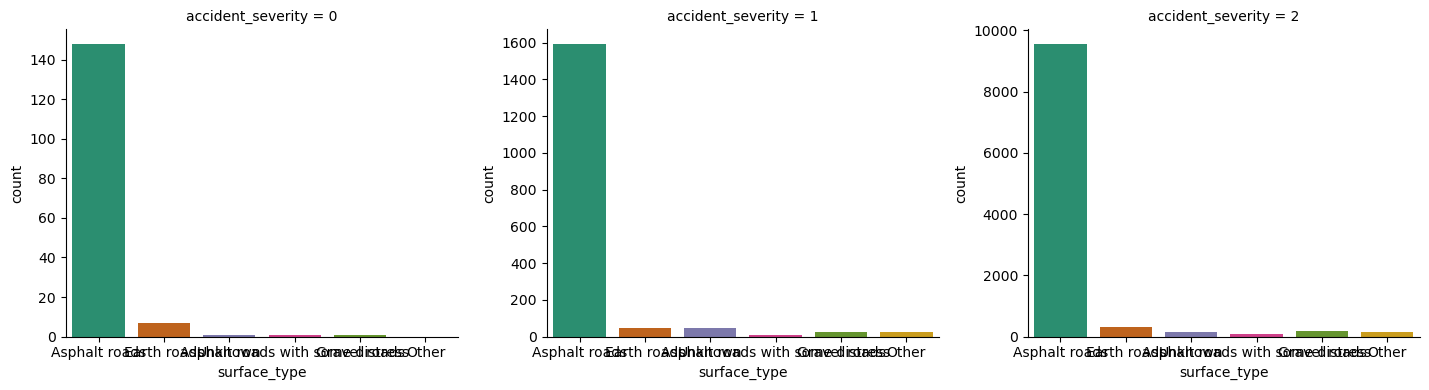

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

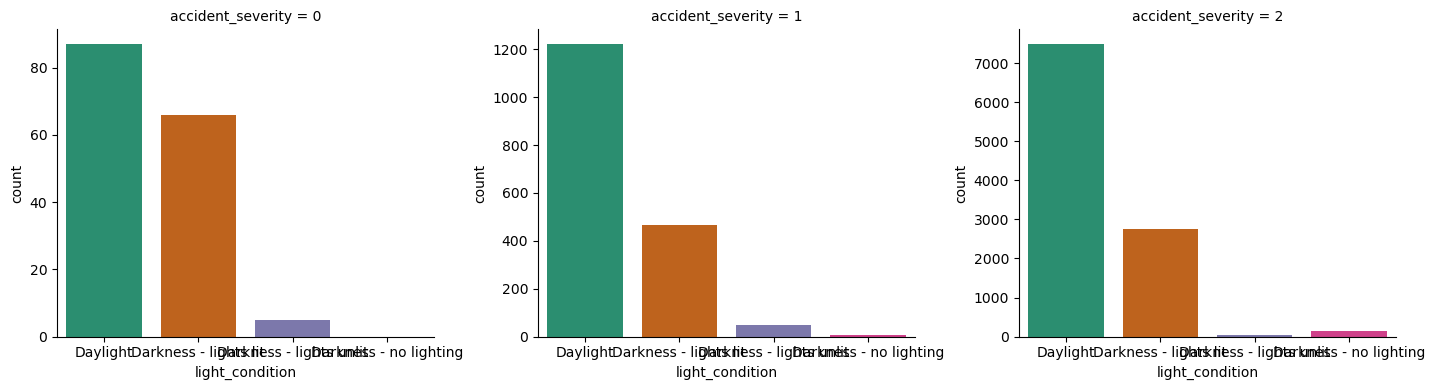

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

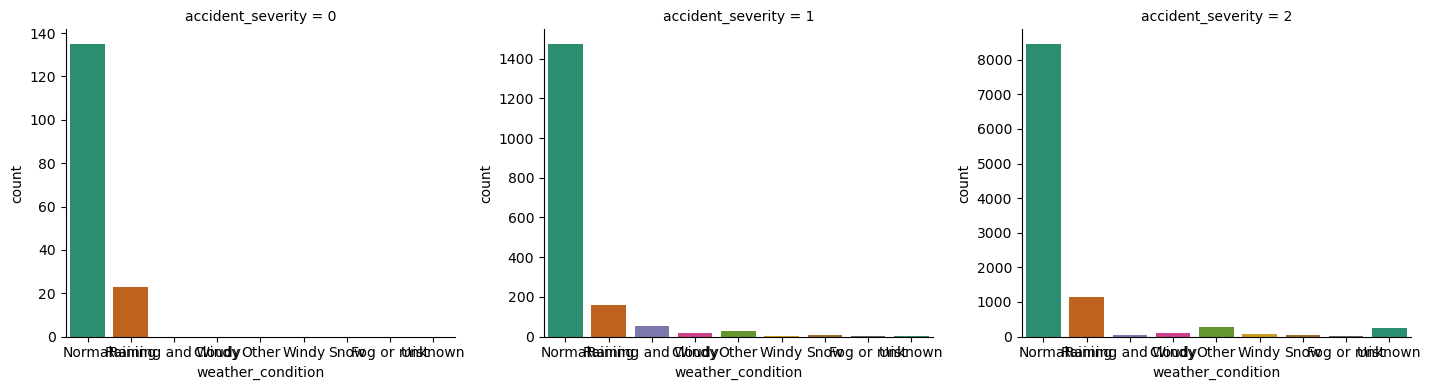

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

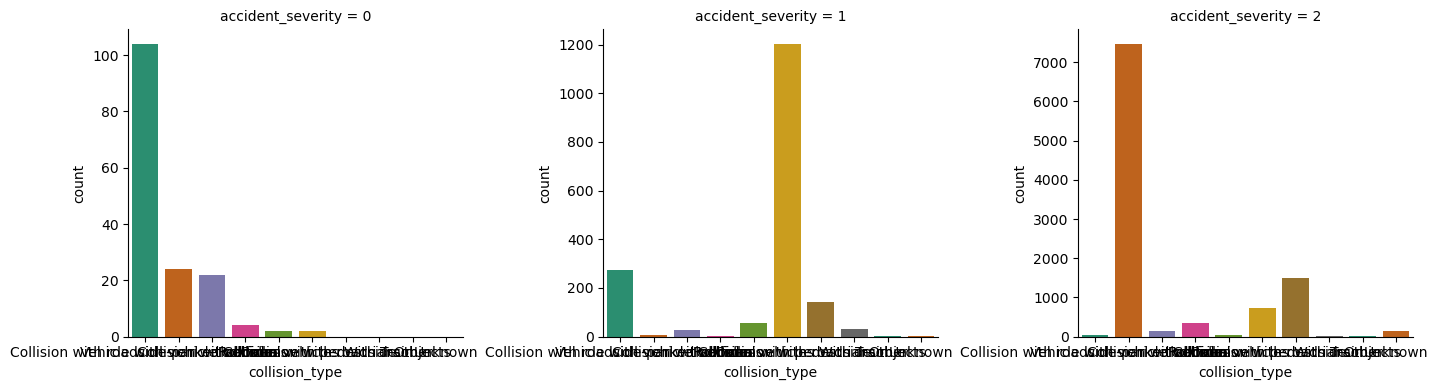

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

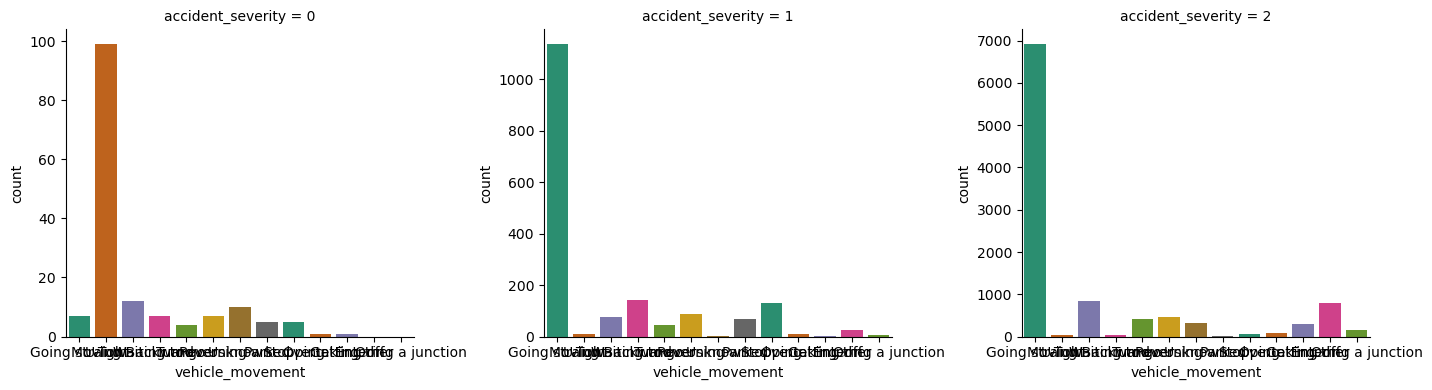

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<IPython.core.display.Javascript object>

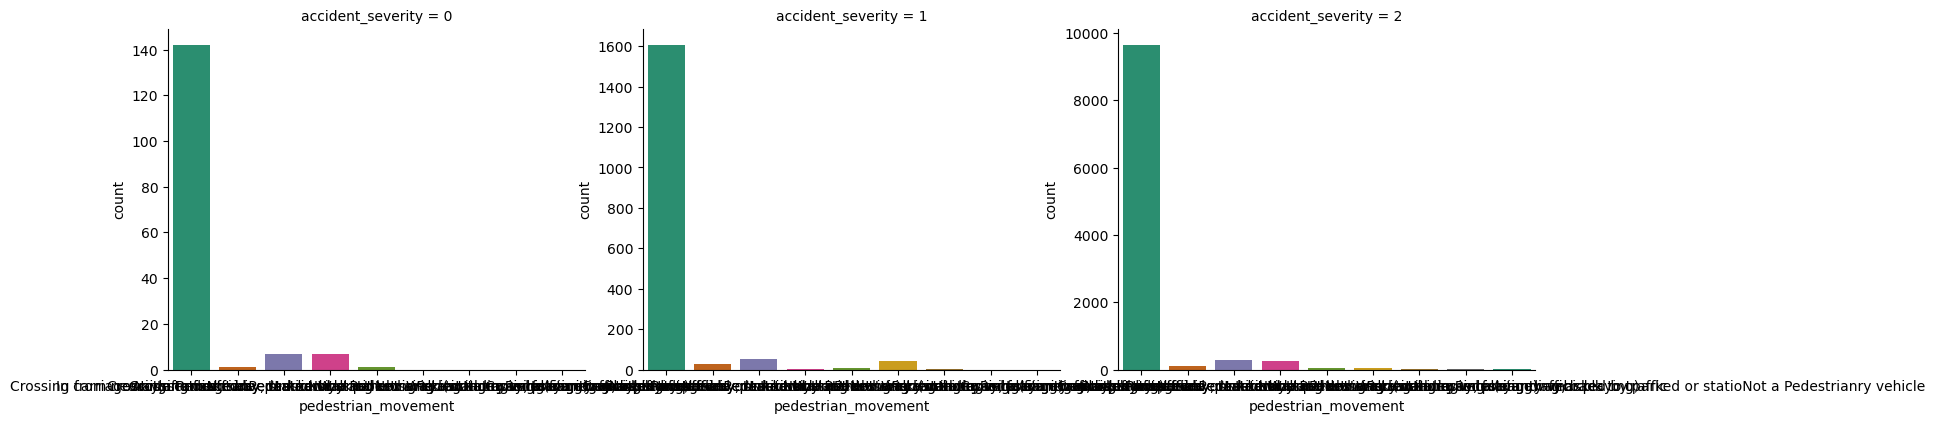

<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

C:\Users\visha\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<IPython.core.display.Javascript object>

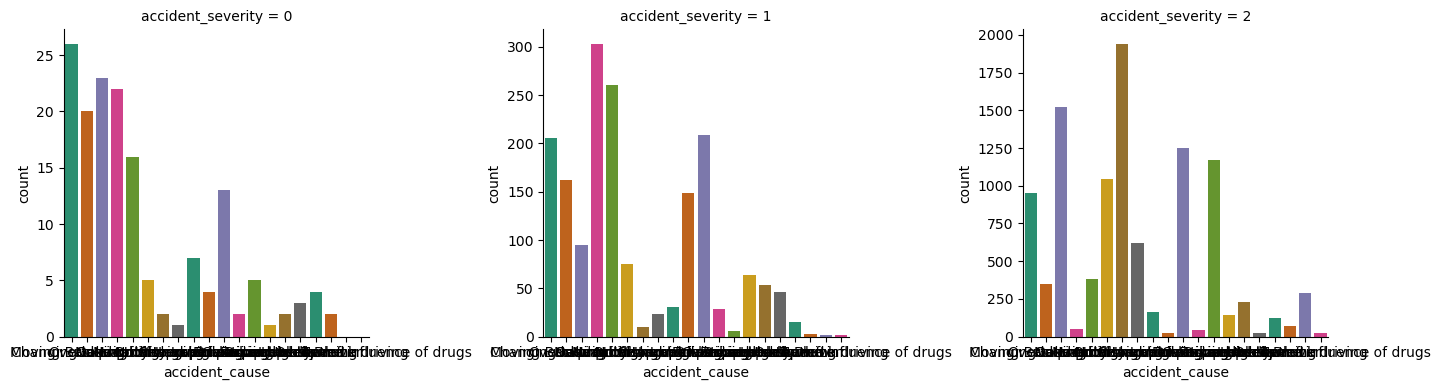

In [38]:
for col in df.drop('accident_severity', axis=1):
    g = sns.FacetGrid(df, col='accident_severity', size=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

#### Observations:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

<AxesSubplot:>

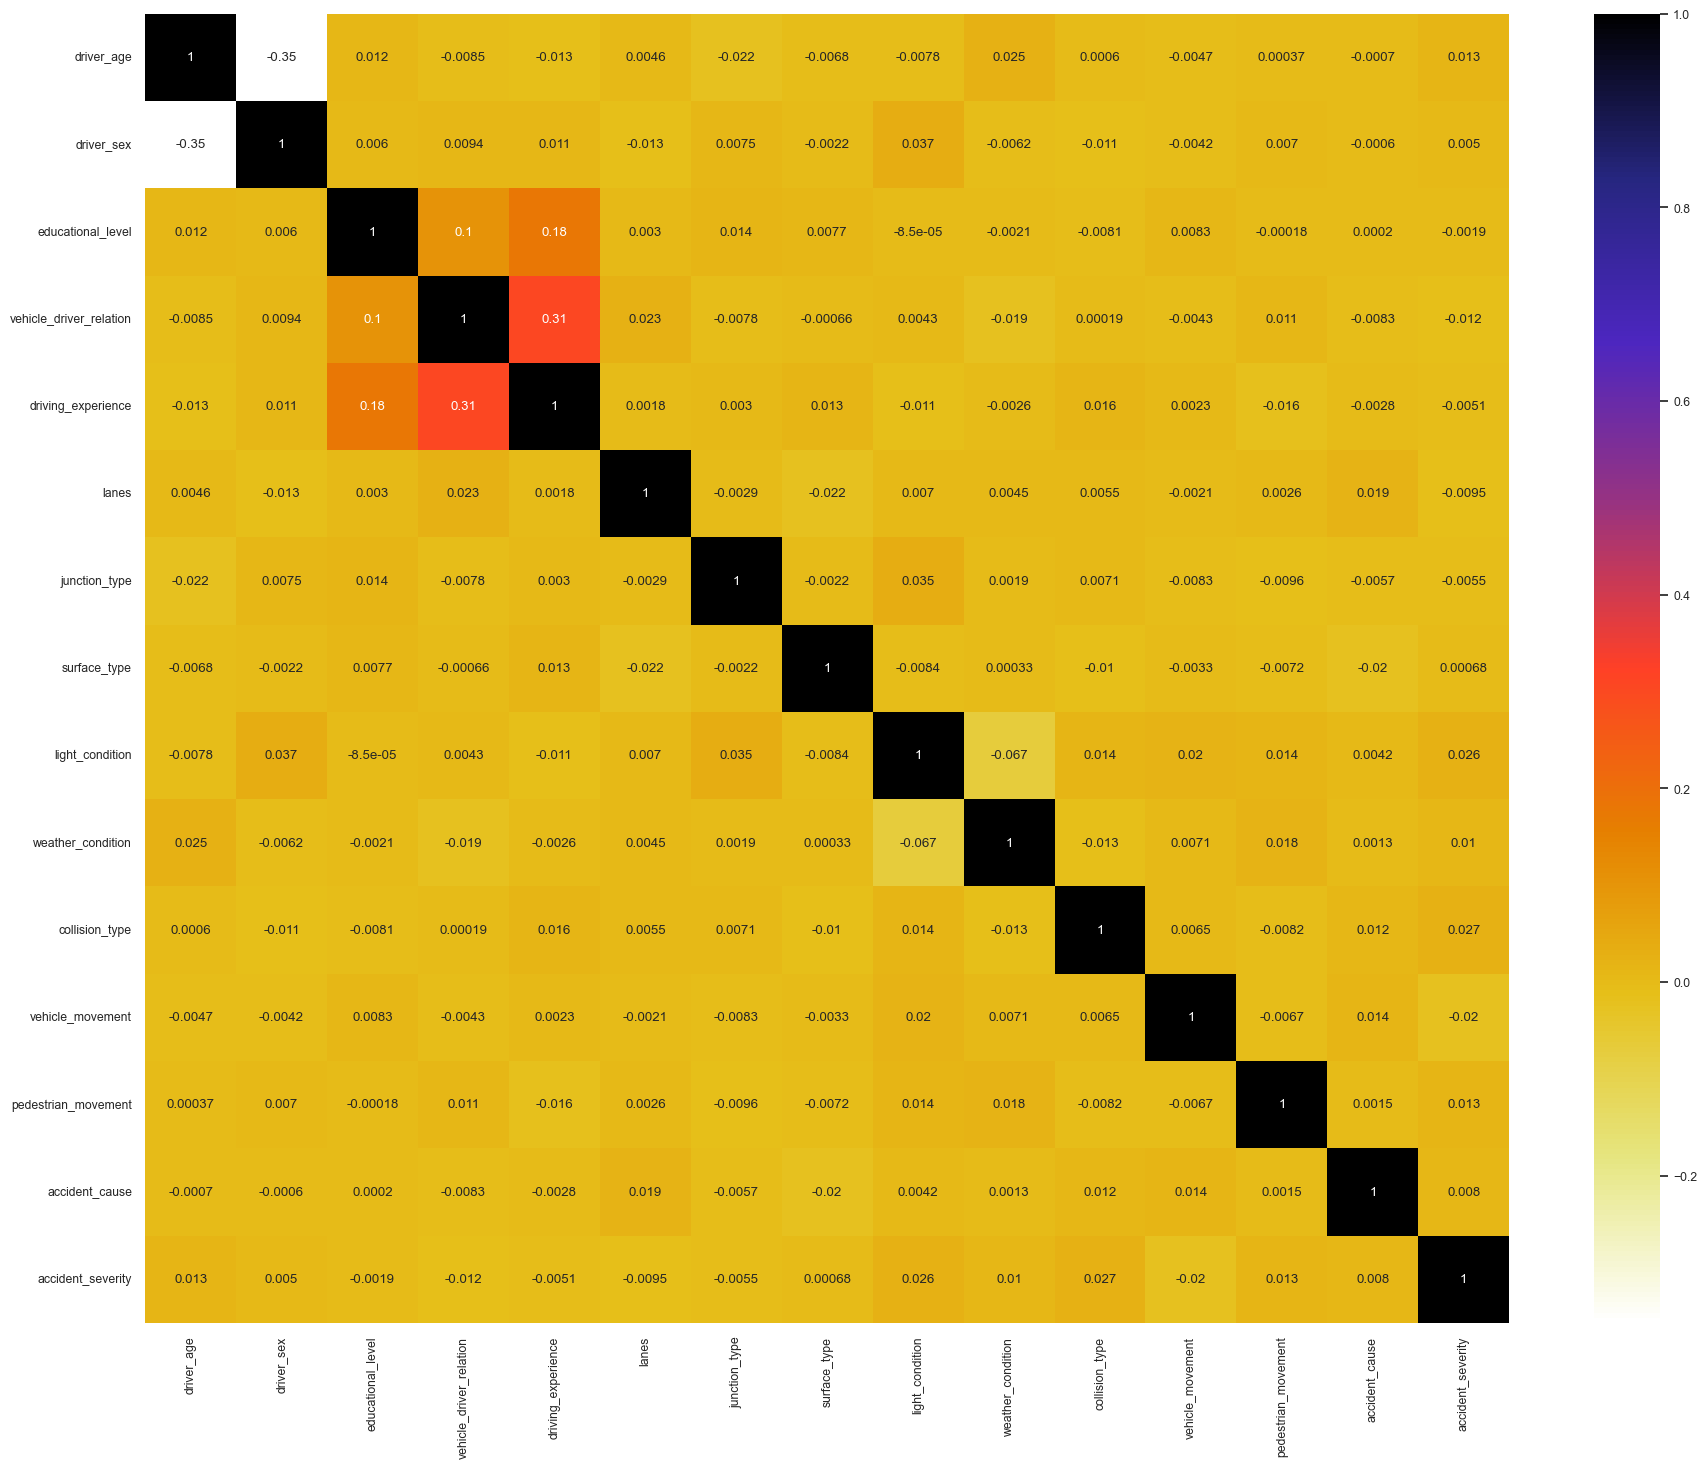

In [47]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [11]:
df.columns

Index(['driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'lanes',
       'junction_type', 'surface_type', 'light_condition', 'weather_condition',
       'collision_type', 'vehicle_movement', 'pedestrian_movement',
       'accident_cause', 'accident_severity'],
      dtype='object')

### Upsampling

In [78]:
X = df.drop('accident_severity', axis=1)
y = df['accident_severity']

In [43]:
y=df['accident_severity']

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1 = le.fit_transform(y)

In [80]:
np.unique(y1)

array([0, 1, 2], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

<IPython.core.display.Javascript object>

(8621, 14) (3695, 14) (8621,) (3695,)


In [47]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 14) (21972,)


In [48]:
y_test

4281     2
4010     2
1022     1
8775     2
10000    2
        ..
9855     2
7302     1
9023     2
7936     2
438      2
Name: accident_severity, Length: 3695, dtype: int64

In [71]:
# y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
# y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

In [84]:
y_test

array([2, 2, 1, ..., 2, 2, 2], dtype=int64)

# Baseline Modeling

In [49]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [50]:
modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)

{'xgb': [0.6936400541271989],
 'rf': [0.7485791610284168],
 'extree': [0.7537212449255751]}

In [51]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [52]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [53]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
model_performance(extree,y_test, y_pred)

# Hyperparameter Tuning

In [55]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.7445983966791784)

In [92]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.8344585303096652)

In [56]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 600)
extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred_tuned)

0.6671177266576455

In [58]:
import pickle

In [59]:
# Save your model
with open('model.pkl', 'wb') as f:
    pickle.dump(extree_tuned, f)

In [1]:
# Load your saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

<IPython.core.display.Javascript object>

In [2]:
loaded_model.predict(X_test)

NameError: name 'X_test' is not defined

In [9]:
X

driver_age  driver_sex  educational_level  vehicle_driver_relation  \
0               0           1                  0                        0   
1               1           1                  4                        0   
2               0           1                  4                        0   
3               0           1                  4                        0   
4               0           1                  4                        0   
...           ...         ...                ...                      ...   
12311           1           1                  5                        0   
12312           4           1                  1                        0   
12313           2           1                  4                        0   
12314           0           0                  4                        0   
12315           0           1                  4                        0   

       driving_experience  lanes  junction_type  surface_type  \
0                       0      5              1             0   
1                       3      4              1             0   
2                       0      6              1             0   
3                       2      6              7             2   
4                       1      6              7             0   
...                   ...    ...            ...           ...   
12311                   1      4              1             0   
12312                   2      2              1             0   
12313                   2      2              1             0   
12314                   3      4              1             0   
12315                   2      4              2             0   

       light_condition  weather_condition  collision_type  vehicle_movement  \
0                    3                  2               3                 2   
1                    3                  2               8                 2   
2                    3                  2               2                 2   
3                    0                  2               8                 2   
4                    0                  2               8                 2   
...                ...                ...             ...               ...   
12311                3                  2               8                 2   
12312                3                  2               8                 4   
12313                3                  2               8                 4   
12314                0                  2               8                 4   
12315                0                  2               8                 8   

       pedestrian_movement  accident_cause  
0                        5               9  
1                        5              16  
2                        5               0  
3                        5               1  
4                        5              16  
...                    ...             ...  
12311                    5              10  
12312                    5              10  
12313                    5               1  
12314                    5               5  
12315                    1               1  

[12316 rows x 14 columns]

# Compressed Model

In [62]:
import gzip
import pickle

# Load your model from the pickle file
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Compress your model using gzip
with gzip.open('model.pkl.gz', 'wb') as f:
    pickle.dump(model, f)


In [63]:
import gzip
import pickle
# Load your compressed model from the gzip file
with gzip.open('model.pkl.gz', 'rb') as f:
    compressed_data = f.read()
    model = pickle.loads(compressed_data)

In [64]:
model.predict(X_test)

array([2, 2, 2, ..., 1, 2, 2], dtype=int64)

In [92]:
X_test.shape

(3695, 14)

In [97]:
df={'driver_age':[54], 'driver_sex':[45], 'educational_level':[64],
       'vehicle_driver_relation':[64], 'driving_experience':[64], 'lanes':[88],
       'junction_type':[33], 'surface_type':[33], 'light_condition':[44], 'weather_condition':[44],
       'collision_type':[44], 'vehicle_movement':[2424], 'pedestrian_movement':[874],
       'accident_cause':[5465]}
data=pd.DataFrame(df)

In [16]:
df.iloc[0,:]

driver_age                                                   18-30
driver_sex                                                    Male
educational_level                                Above high school
vehicle_driver_relation                                   Employee
driving_experience                                           1-2yr
lanes                                                      Unknown
junction_type                                          No junction
surface_type                                         Asphalt roads
light_condition                                           Daylight
weather_condition                                           Normal
collision_type             Collision with roadside-parked vehicles
vehicle_movement                                    Going straight
pedestrian_movement                               Not a Pedestrian
accident_cause                                     Moving Backward
accident_severity                                             

In [76]:
dict1={'driver_age': '18-30' , 'driver_sex':'Male', 'educational_level':'Above high school',
       'vehicle_driver_relation':'Employee', 'driving_experience':'1-2yr', 'lanes':'Unknown',
       'junction_type':'No junction', 'surface_type':'Asphalt roads', 'light_condition':'Daylight', 'weather_condition':'Normal',
       'collision_type':'Collision with roadside-parked vehicles', 'vehicle_movement':' Going straight', 'pedestrian_movement':'Not a Pedestrian',
       'accident_cause':'Moving Backward'}

In [82]:
# df

In [77]:
dct = {k:[v] for k,v in dict1.items()} # WORKAROUND
df1 = pd.DataFrame(dct)
# df1=pd.DataFrame(dict1)

ValueError: If using all scalar values, you must pass an index

In [ ]:
df1

In [66]:
df1

driver_age driver_sex  educational_level vehicle_driver_relation  \
0      18-30       Male  Above high school                Employee   

  driving_experience    lanes junction_type   surface_type light_condition  \
0              1-2yr  Unknown   No junction  Asphalt roads        Daylight   

  weather_condition                           collision_type vehicle_movement  \
0            Normal  Collision with roadside-parked vehicles   Going straight   

  pedestrian_movement   accident_cause  
0    Not a Pedestrian  Moving Backward

In [69]:
df2

driver_age driver_sex  educational_level vehicle_driver_relation  \
0      18-30       Male  Above high school                Employee   

  driving_experience    lanes junction_type   surface_type light_condition  \
0              1-2yr  Unknown   No junction  Asphalt roads        Daylight   

  weather_condition                           collision_type vehicle_movement  \
0            Normal  Collision with roadside-parked vehicles   Going straight   

  pedestrian_movement   accident_cause  
0    Not a Pedestrian  Moving Backward

In [68]:
df2=df1

In [75]:
le.map(df2.iloc[0,:])

AttributeError: 'LabelEncoder' object has no attribute 'map'

driver_age  driver_sex  educational_level  vehicle_driver_relation  \
0           0           0                  0                        0   

   driving_experience  lanes  junction_type  surface_type  light_condition  \
0                   0      0              0             0                0   

   weather_condition  collision_type  vehicle_movement  pedestrian_movement  \
0                  0               0                 0                    0   

   accident_cause  
0               0

In [46]:
df['driver_age'][0]

'18-30'

In [47]:
df

driver_age driver_sex   educational_level vehicle_driver_relation  \
0          18-30       Male   Above high school                Employee   
1          31-50       Male  Junior high school                Employee   
2          18-30       Male  Junior high school                Employee   
3          18-30       Male  Junior high school                Employee   
4          18-30       Male  Junior high school                Employee   
...          ...        ...                 ...                     ...   
12311      31-50       Male             Unknown                Employee   
12312    Unknown       Male   Elementary school                Employee   
12313    Over 51       Male  Junior high school                Employee   
12314      18-30     Female  Junior high school                Employee   
12315      18-30       Male  Junior high school                Employee   

      driving_experience                                             lanes  \
0                  1-2yr                                           Unknown   
1             Above 10yr                                 Undivided Two way   
2                  1-2yr                                             other   
3                 5-10yr                                             other   
4                  2-5yr                                             other   
...                  ...                                               ...   
12311              2-5yr                                 Undivided Two way   
12312             5-10yr  Two-way (divided with broken lines road marking)   
12313             5-10yr  Two-way (divided with broken lines road marking)   
12314         Above 10yr                                 Undivided Two way   
12315             5-10yr                                 Undivided Two way   

      junction_type   surface_type        light_condition weather_condition  \
0       No junction  Asphalt roads               Daylight            Normal   
1       No junction  Asphalt roads               Daylight            Normal   
2       No junction  Asphalt roads               Daylight            Normal   
3           Y Shape    Earth roads  Darkness - lights lit            Normal   
4           Y Shape  Asphalt roads  Darkness - lights lit            Normal   
...             ...            ...                    ...               ...   
12311   No junction  Asphalt roads               Daylight            Normal   
12312   No junction  Asphalt roads               Daylight            Normal   
12313   No junction  Asphalt roads               Daylight            Normal   
12314   No junction  Asphalt roads  Darkness - lights lit            Normal   
12315       O Shape  Asphalt roads  Darkness - lights lit            Normal   

                                collision_type vehicle_movement  \
0      Collision with roadside-parked vehicles   Going straight   
1               Vehicle with vehicle collision   Going straight   
2              Collision with roadside objects   Going straight   
3               Vehicle with vehicle collision   Going straight   
4               Vehicle with vehicle collision   Going straight   
...                                        ...              ...   
12311           Vehicle with vehicle collision   Going straight   
12312           Vehicle with vehicle collision            Other   
12313           Vehicle with vehicle collision            Other   
12314           Vehicle with vehicle collision            Other   
12315           Vehicle with vehicle collision         Stopping   

                                     pedestrian_movement  \
0                                       Not a Pedestrian   
1                                       Not a Pedestrian   
2                                       Not a Pedestrian   
3                                       Not a Pedestrian   
4                                       Not a Pedestrian   
...                                                  .

In [58]:
X

driver_age  driver_sex  educational_level  vehicle_driver_relation  \
0               0           1                  0                        0   
1               1           1                  4                        0   
2               0           1                  4                        0   
3               0           1                  4                        0   
4               0           1                  4                        0   
...           ...         ...                ...                      ...   
12311           1           1                  5                        0   
12312           4           1                  1                        0   
12313           2           1                  4                        0   
12314           0           0                  4                        0   
12315           0           1                  4                        0   

       driving_experience  lanes  junction_type  surface_type  \
0                       0      5              1             0   
1                       3      4              1             0   
2                       0      6              1             0   
3                       2      6              7             2   
4                       1      6              7             0   
...                   ...    ...            ...           ...   
12311                   1      4              1             0   
12312                   2      2              1             0   
12313                   2      2              1             0   
12314                   3      4              1             0   
12315                   2      4              2             0   

       light_condition  weather_condition  collision_type  vehicle_movement  \
0                    3                  2               3                 2   
1                    3                  2               8                 2   
2                    3                  2               2                 2   
3                    0                  2               8                 2   
4                    0                  2               8                 2   
...                ...                ...             ...               ...   
12311                3                  2               8                 2   
12312                3                  2               8                 4   
12313                3                  2               8                 4   
12314                0                  2               8                 4   
12315                0                  2               8                 8   

       pedestrian_movement  accident_cause  
0                        5               9  
1                        5              16  
2                        5               0  
3                        5               1  
4                        5              16  
...                    ...             ...  
12311                    5              10  
12312                    5              10  
12313                    5               1  
12314                    5               5  
12315                    1               1  

[12316 rows x 14 columns]

In [78]:
df2

driver_age driver_sex  educational_level vehicle_driver_relation  \
0      18-30       Male  Above high school                Employee   

  driving_experience    lanes junction_type   surface_type light_condition  \
0              1-2yr  Unknown   No junction  Asphalt roads        Daylight   

  weather_condition                           collision_type vehicle_movement  \
0            Normal  Collision with roadside-parked vehicles   Going straight   

  pedestrian_movement   accident_cause  
0    Not a Pedestrian  Moving Backward

In [80]:
le.transform(df2['driver_age'])

array([2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_age               12316 non-null  object
 1   driver_sex               12316 non-null  object
 2   educational_level        12316 non-null  object
 3   vehicle_driver_relation  12316 non-null  object
 4   driving_experience       12316 non-null  object
 5   lanes                    12316 non-null  object
 6   junction_type            12316 non-null  object
 7   surface_type             12316 non-null  object
 8   light_condition          12316 non-null  object
 9   weather_condition        12316 non-null  object
 10  collision_type           12316 non-null  object
 11  vehicle_movement         12316 non-null  object
 12  pedestrian_movement      12316 non-null  object
 13  accident_cause           12316 non-null  object
 14  accident_severity        12316 non-nul